# DATA MINING ASSIGNMENT 1

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from datetime import datetime

In [2]:
 %matplotlib

Using matplotlib backend: <object object at 0x0000013A6746D6C0>


In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\meme5\Downloads\Hotel Reservations.csv')

In [159]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_family,customer_type,season,day_of_week
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,No,adults,fall,Tuesday
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,No,adults,fall,Saturday
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,No,adults,winter,Sunday
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,No,adults,spring,Saturday
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,No,adults,spring,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,No,adults,summer,Wednesday
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,No,adults,fall,Wednesday
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,No,adults,summer,Monday
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,No,adults,spring,Sunday


In [50]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# Task1: Customers' type Majority

# Manual statastics

In [6]:
#Number of adults with children (families)
df1 = len(df[(df['no_of_children']>0) & (df['no_of_adults']>0)])
df1

2559

In [7]:
#Number of adults with no children
df2 = len(df[(df["no_of_children"]==0) & 
             (df["no_of_adults"]>0)])
df2

33577

In [8]:
family_precentage=df1/(36275)
family_precentage

0.07054445210199863

In [9]:
adults_precentage=df2/(36275)
adults_precentage

0.9256237077877326

In [10]:
# Create a list of labels
labels1 = ['Adults', 'Families']

# Visualaizations

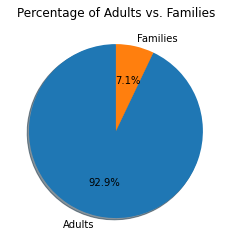

In [11]:
# Create a list of sizes
sizes = [adults_precentage,family_precentage]

# Create a pie chart
plt.pie(sizes, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=90)
# Set the title
plt.title('Percentage of Adults vs. Families')

# Show the plot
plt.show()

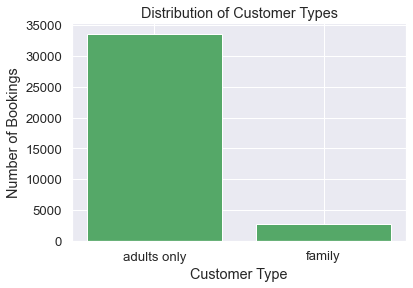

In [166]:
df["customer_type"] = df.apply(lambda x: "adults only" if x["no_of_children"] == 0 else "family", axis=1)

# Count the number of bookings in each category
customer_counts = df["customer_type"].value_counts()

# Create a bar chart to visualize the distribution of customer types
plt.bar(customer_counts.index, customer_counts.values, color="g")
plt.xlabel("Customer Type")
plt.ylabel("Number of Bookings")
plt.title("Distribution of Customer Types")
plt.show()

In [54]:
family=df[(df['no_of_children']>0) & (df['no_of_adults']>0)]
family_df=pd.DataFrame(family)
no_child=df[(df['no_of_children']==0) & (df['no_of_adults']>0)]
nochild_df=pd.DataFrame(no_child)

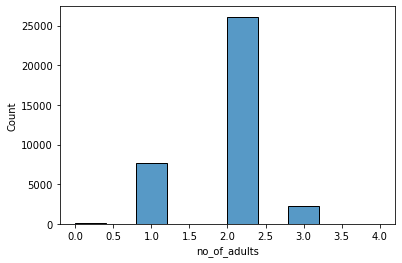

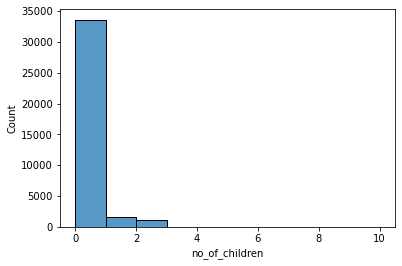

In [56]:
sns.histplot(data=df, x='no_of_adults', bins=10)
plt.show()

sns.histplot(data=df, x='no_of_children', bins=10)
plt.show()

# TASK 2:Type of customers are less likely to cancel the booking.

In [12]:
not_cancelled=df[(df["booking_status"]=='Not_Canceled')]
#not_cancelled.head(20)

In [13]:
noc_df=pd.DataFrame(not_cancelled)
noc_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36265,INN36266,2,0,1,3,Meal Plan 1,0,Room_Type 1,15,2018,5,30,Online,0,0,0,100.73,0,Not_Canceled
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled


In [14]:
#not cancelling Families
df4 = len(noc_df[(noc_df['no_of_children']>0) & (noc_df['no_of_adults']>0)])
df4

1600

In [15]:
df5 = len(noc_df[(noc_df["no_of_children"]==0) & 
             (noc_df["no_of_adults"]>0)])
df5

22695

In [16]:
df6=len(noc_df[(noc_df["no_of_adults"]==0)])
df6

95

In [29]:
total1=df4+df5+df6

In [30]:
ncfam_percent=df4/(total1)
ncfam_percent

0.06560065600656007

In [31]:
ncadults_percent=df5/(total1)
ncadults_percent

0.9305043050430505

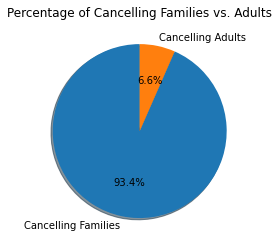

In [33]:
# Create a list of sizes
Labels2=["Cancelling Families","Cancelling Adults"]
size = [ncadults_percent,ncfam_percent]

# Create a pie chart
plt.pie(size, labels=Labels2, autopct='%1.1f%%', shadow=True, startangle=90)
# Set the title
plt.title('Percentage of Cancelling Families vs. Adults')

# Show the plot
plt.show()

<AxesSubplot:xlabel='customer_type', ylabel='count'>

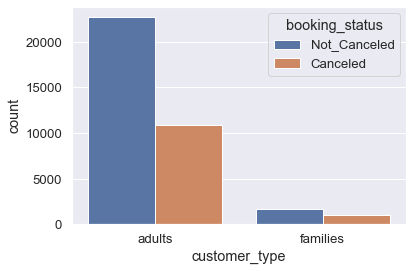

In [151]:
df['customer_type'] = 'adults'
df.loc[df['no_of_children'] > 0, 'customer_type'] = 'families'

# Visualize the cancellation rates by customer type
sns.countplot(data=df, x='customer_type', hue='booking_status')
              

<AxesSubplot:xlabel='customer_type', ylabel='count'>

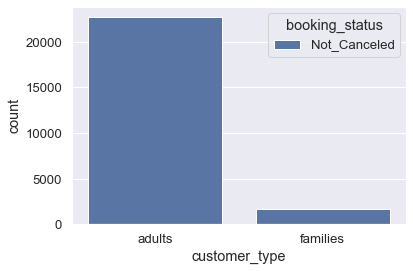

In [152]:
df_not_canceled = df[df['booking_status'] == 'Not_Canceled']

# Create the plot
sns.countplot(x='customer_type', hue='booking_status', data=df_not_canceled)

# TASK 3: Weekend or weekdays nights

In [20]:
weekend=df["no_of_weekend_nights"].sum()
weekend

29409

In [22]:
week=df["no_of_week_nights"].sum()
week

79961

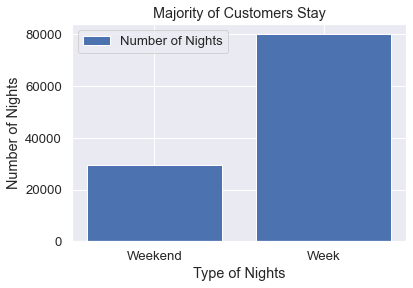

In [153]:
plt.bar(['Weekend','Week'], [weekend. sum(),week. sum()],label='Number of Nights')
plt.xlabel('Type of Nights')
plt.ylabel('Number of Nights')
plt.title('Majority of Customers Stay')
plt.legend()
plt.show()

# Task 4: Customer behavior that tends to stay for an extended period of time for example full week. 

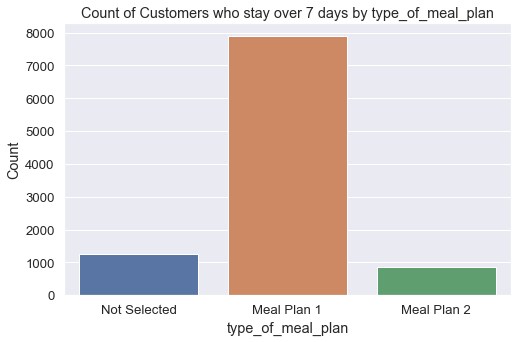

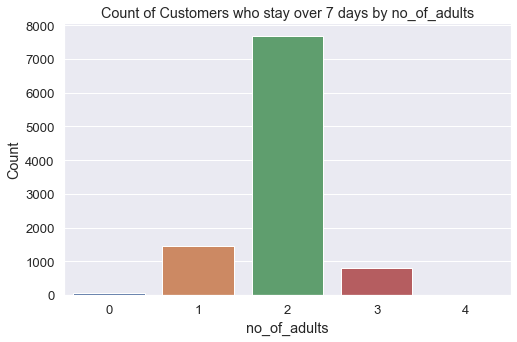

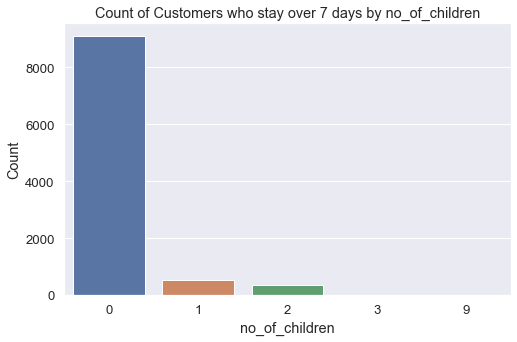

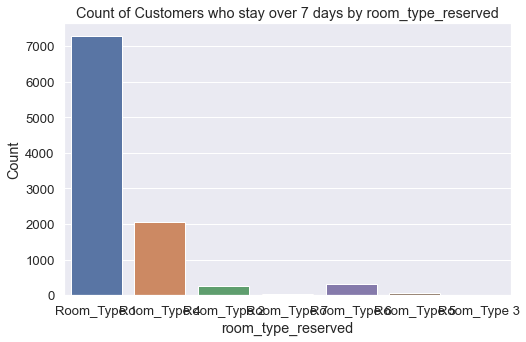

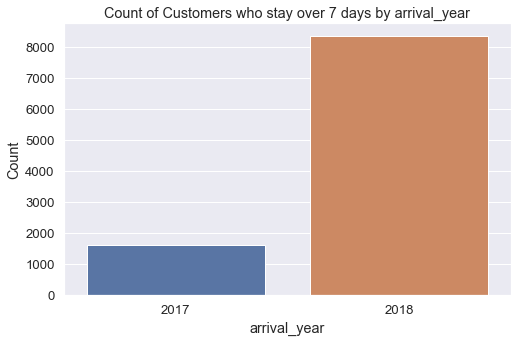

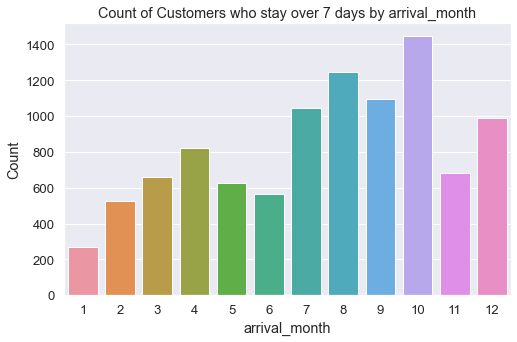

In [168]:
long_stay = df[(df['no_of_week_nights'] >= 5) | (df['no_of_weekend_nights'] >= 2)]

# Select the columns to visualize
cols_to_visualize = [ 'type_of_meal_plan', 'no_of_adults','no_of_children', 'room_type_reserved', 'arrival_year','arrival_month']

# Plot the countplot for each column
for col in cols_to_visualize:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=col, data=long_stay)
    plt.title(f'Count of Customers who stay over 7 days by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

C:\Users\meme5\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


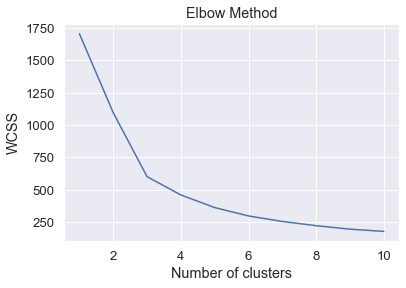

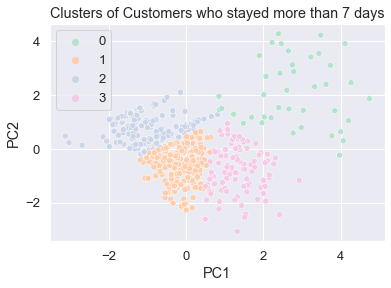

In [130]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\meme5\Downloads\Hotel Reservations.csv')

# Filter customers who stayed more than 7 days
data = data[data['no_of_week_nights'] + data['no_of_weekend_nights'] > 7]

# Select relevant columns
cols = ['no_of_adults', 'no_of_children', 'lead_time', 'avg_price_per_room', 'no_of_special_requests']
data = data[cols]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Use PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Use KMeans to cluster the data
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_pca)

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=cluster_labels, palette='Pastel2')
plt.title('Clusters of Customers who stayed more than 7 days')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# Task 5: Meal type for non cancelled

In [45]:
meal1=(noc_df["type_of_meal_plan"]=="Meal Plan 1").sum()
meal1

19156

In [44]:
meal2=(noc_df["type_of_meal_plan"]=="Meal Plan 2").sum()
meal2

1799

In [43]:
meal3=(noc_df["type_of_meal_plan"]=="Meal Plan 3").sum()
meal3

4

In [42]:
not_selected=(noc_df["type_of_meal_plan"]=="Not Selected").sum()
not_selected

3431

In [46]:
meal1+meal2+meal3+not_selected

24390

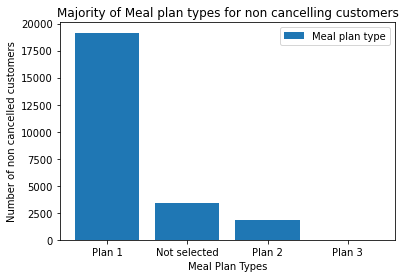

In [81]:
plt.bar(['Plan 1','Not selected','Plan 2','Plan 3'], [meal1. sum(),not_selected.sum(), meal2. sum(), meal3.sum()],label='Meal plan type')
plt.xlabel('Meal Plan Types')
plt.ylabel('Number of non cancelled customers')
plt.title('Majority of Meal plan types for non cancelling customers')
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

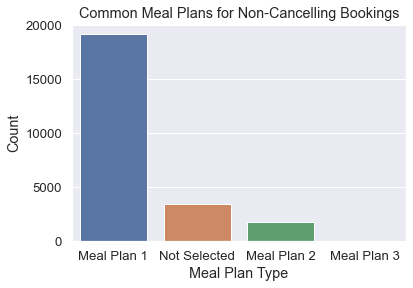

In [128]:
# Get the count of each meal plan type
meal_counts = noc_df['type_of_meal_plan'].value_counts()

# Create a barplot to visualize the meal plan counts
sns.barplot(x=meal_counts.index, y=meal_counts.values)

# Set the plot title and axis labels
plt.title('Common Meal Plans for Non-Cancelling Bookings')
plt.xlabel('Meal Plan Type')
plt.ylabel('Count')

# Show the plot

# TASK 6: Most frequent booked room

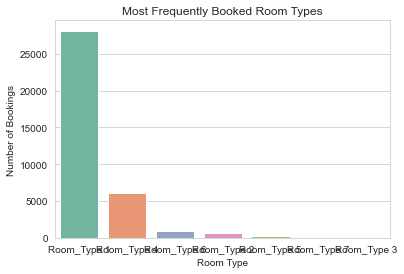

In [90]:
sns.set_style("whitegrid")

room_counts = df['room_type_reserved'].value_counts()

sns.barplot(x=room_counts.index, y=room_counts.values, palette="Set2")
plt.title("Most Frequently Booked Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Bookings")
plt.show()

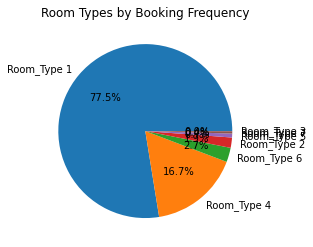

In [86]:
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%')
plt.title('Room Types by Booking Frequency')
plt.show()

# Task 7 :Booking distribution by years, months, seasons, days

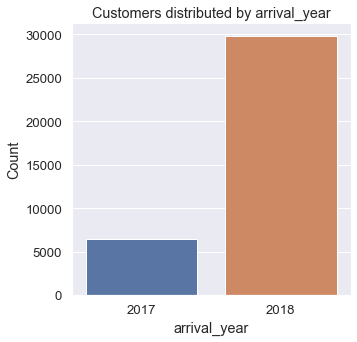

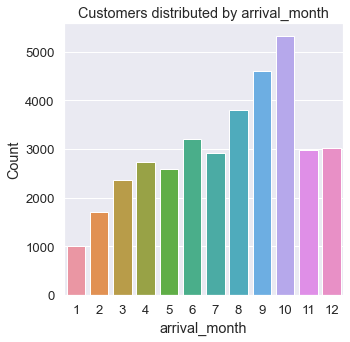

In [149]:

# Select the columns to visualize
cols = ['arrival_year','arrival_month']

# Plot the countplot for each column
for col in cols:
    plt.figure(figsize=(5,5))
    ax = sns.countplot(x=col, data=df)
    plt.title(f'Customers distributed by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

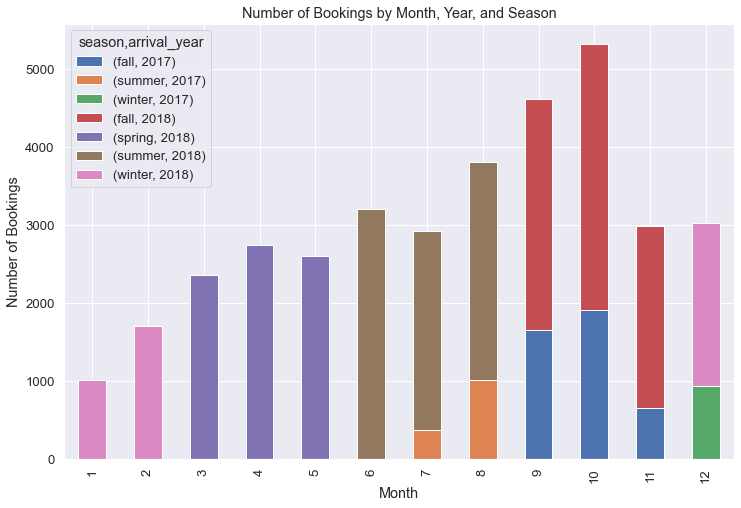

In [154]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    else:
        return 'fall'

# Create a new column for the season of each booking
df['season'] = df['arrival_month'].apply(get_season)

# Group the data by year, season, and month and count the number of bookings in each group
booking_counts = df.groupby(['arrival_year', 'season', 'arrival_month'])['Booking_ID'].count().reset_index()

# Pivot the data to create a stacked bar chart
booking_pivot = booking_counts.pivot(index='arrival_month', columns=['season', 'arrival_year'], values='Booking_ID')
booking_pivot.plot(kind='bar', stacked=True, figsize=(12,8))

# Set the chart title and axis labels
plt.title('Number of Bookings by Month, Year, and Season')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')

# Show the chart
plt.show()

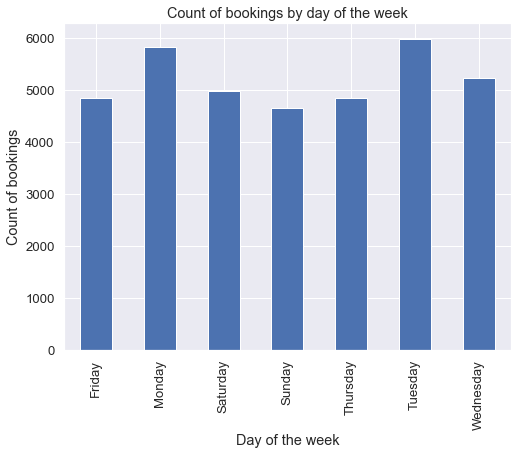

In [158]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], format='%d')

# Add a new column for day of the week
df['day_of_week'] = df['arrival_date'].apply(lambda x: datetime.strftime(x, '%A'))

# Visualize count of bookings by day of the week
plt.figure(figsize=(8,6))
df.groupby('day_of_week')['Booking_ID'].count().plot(kind='bar')
plt.title('Count of bookings by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count of bookings')
plt.show()

# Task 8: Similarities between customers

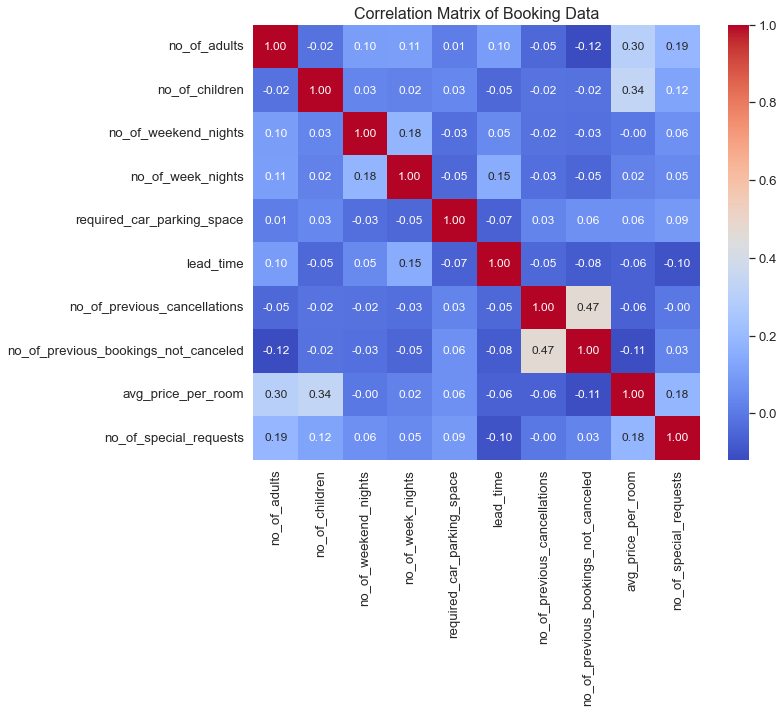

In [125]:
cols_to_include = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                   'required_car_parking_space', 'lead_time', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# Compute the correlation matrix
corr_matrix = df[cols_to_include].corr()

# Plot the heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, annot_kws={"size": 12}, fmt='.2f')
plt.title('Correlation Matrix of Booking Data', fontsize=16)
plt.show()

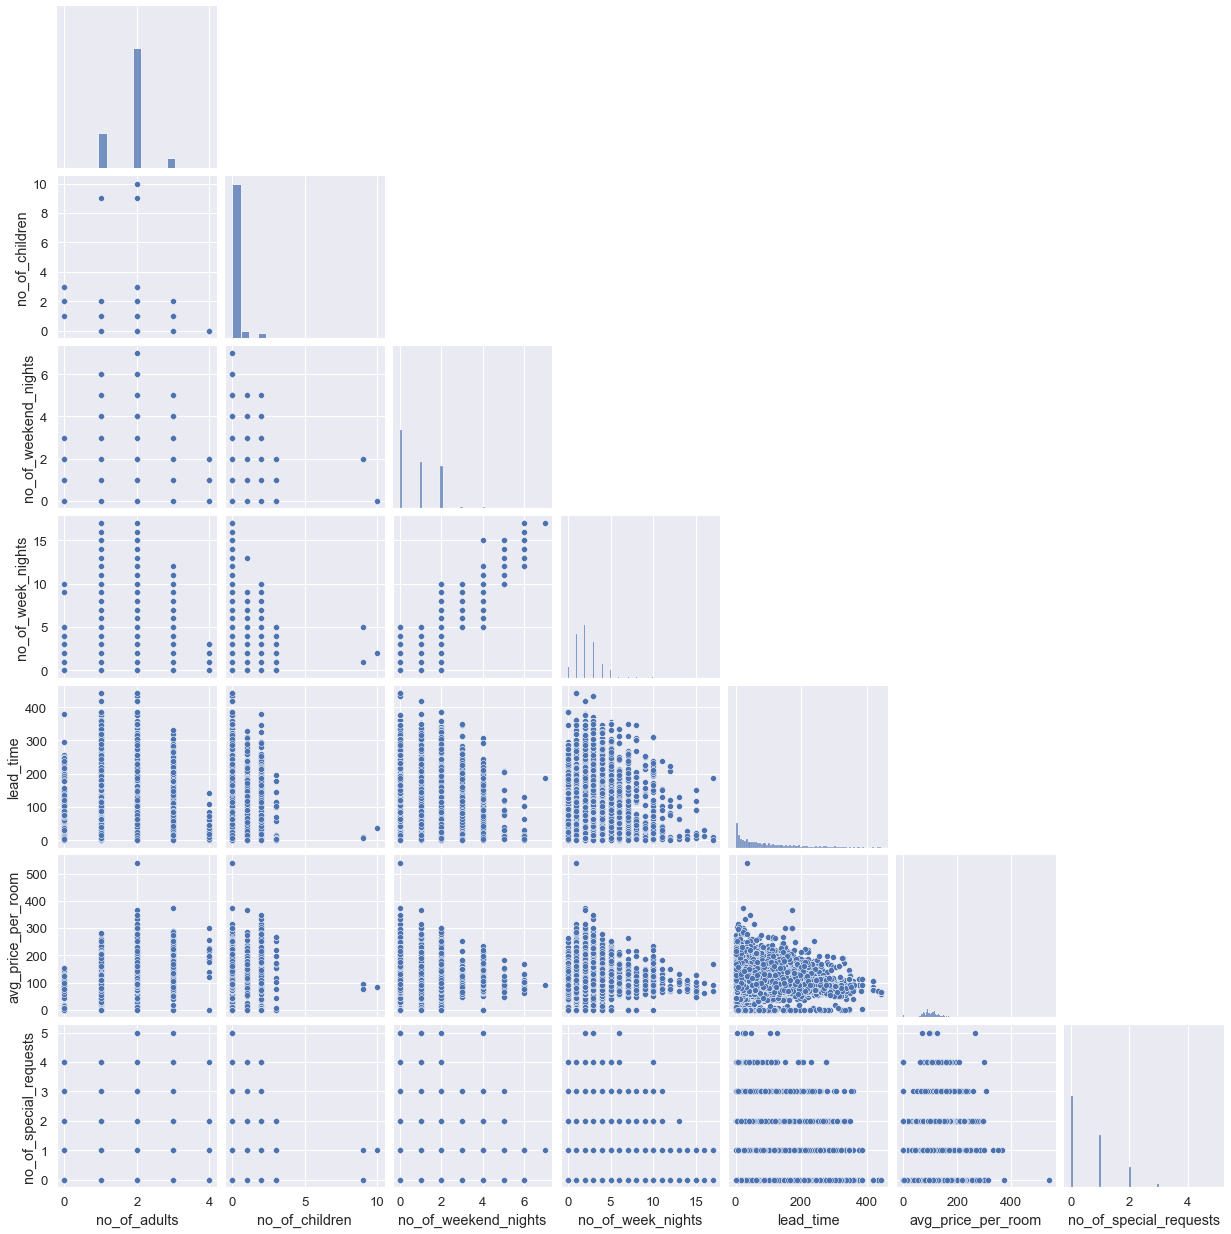

In [132]:
# Select columns of interest
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 
        'avg_price_per_room', 'no_of_special_requests']

# Create scatter plot matrix
sns.pairplot(df[cols], corner=True)

# Task 9: Find outliers in data

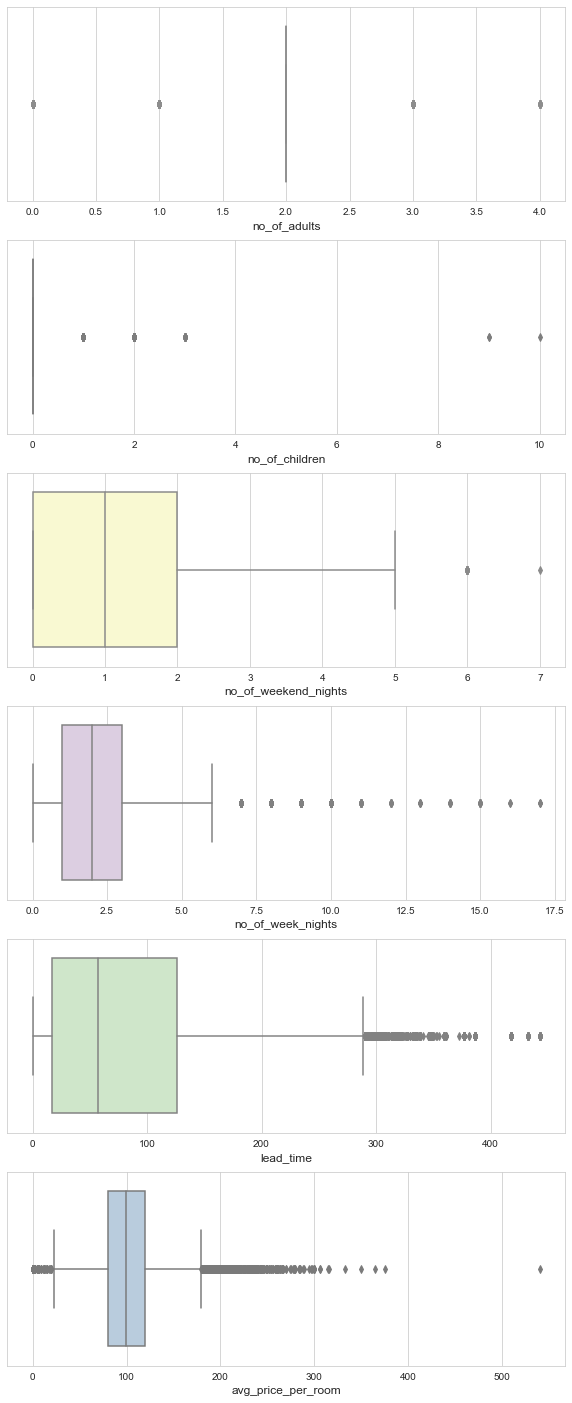

In [121]:
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'avg_price_per_room']

# Create figure with multiple subplots
fig, axs = plt.subplots(len(cols),1, figsize=(10, 25))
#ncols=len(cols)
# Set color palette
colors = sns.color_palette('Pastel1_r', len(cols))

# Plot boxplots for each column
for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axs[i], color=colors[i])
    axs[i].set_xlabel(col, fontsize=12)

plt.show()